In [117]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\Users\hp\Downloads\travel_dataset.csv")
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [119]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [120]:
df.groupby(by="MaritalStatus")["Age"].mean()

MaritalStatus
Divorced     38.556906
Married      38.264614
Single       35.767386
Unmarried    36.539589
Name: Age, dtype: float64

## Fill The Missing Values

In [121]:
df.loc[(df["MaritalStatus"]=="Divorced")&(df["Age"].isna()),"Age"]=df.groupby(by="MaritalStatus")["Age"].mean()[0]

In [122]:
df["Age"].isna().sum()

181

In [123]:
df.loc[(df["MaritalStatus"]=="Married")&(df["Age"].isna()),"Age"]=df.groupby(by="MaritalStatus")["Age"].mean()[1]
df.loc[(df["MaritalStatus"]=="Single")&(df["Age"].isna()),"Age"]=df.groupby(by="MaritalStatus")["Age"].mean()[2]
df.loc[(df["MaritalStatus"]=="Unmarried")&(df["Age"].isna()),"Age"]=df.groupby(by="MaritalStatus")["Age"].mean()[3]
df["Age"].isna().sum()

0

In [124]:
df["TypeofContact"].isna().sum()

25

In [125]:
df["TypeofContact"]=np.where(df["TypeofContact"].isna(),df["TypeofContact"].mode(),df["TypeofContact"])
df["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64

In [126]:
df["TypeofContact"].isna().sum()

0

In [127]:
df["DurationOfPitch"].mean()

15.490834591330602

In [128]:
df["DurationOfPitch"].median()

13.0

In [129]:
df["DurationOfPitch"]=np.where(df["DurationOfPitch"].isna(),df["DurationOfPitch"].median(),df["DurationOfPitch"])
df["NumberOfFollowups"]=np.where(df["NumberOfFollowups"].isna(),df["NumberOfFollowups"].median(),df["NumberOfFollowups"])
df["NumberOfTrips"].mean()

3.236520640269587

In [130]:
df["NumberOfTrips"].median()

3.0

In [131]:
df["NumberOfTrips"]=np.where(df["NumberOfTrips"].isna(),df["NumberOfTrips"].median(),df["NumberOfTrips"])
df.loc[(df["MaritalStatus"]=="Divorced")&(df["Age"].isna()),"Age"]=df.groupby(by="MaritalStatus")["Age"].mean()[0]
df.groupby(by="MaritalStatus")["NumberOfChildrenVisiting"].mean()

MaritalStatus
Divorced     1.157556
Married      1.212462
Single       0.997768
Unmarried    1.391496
Name: NumberOfChildrenVisiting, dtype: float64

In [132]:
df.loc[(df["MaritalStatus"]=="Divorced")&(df["NumberOfChildrenVisiting"].isna()),"NumberOfChildrenVisiting"]=df.groupby(by="MaritalStatus")["NumberOfChildrenVisiting"].mean()[0]
df.loc[(df["MaritalStatus"]=="Married")&(df["NumberOfChildrenVisiting"].isna()),"NumberOfChildrenVisiting"]=df.groupby(by="MaritalStatus")["NumberOfChildrenVisiting"].mean()[1]
df.loc[(df["MaritalStatus"]=="Single")&(df["NumberOfChildrenVisiting"].isna()),"NumberOfChildrenVisiting"]=df.groupby(by="MaritalStatus")["NumberOfChildrenVisiting"].mean()[2]
df.loc[(df["MaritalStatus"]=="Unmarried")&(df["NumberOfChildrenVisiting"].isna()),"NumberOfChildrenVisiting"]=df.groupby(by="MaritalStatus")["NumberOfChildrenVisiting"].mean()[3]
df["Designation"].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [133]:
df.groupby(by="Designation")["MonthlyIncome"].median()

Designation
AVP               32181.0
Executive         20689.0
Manager           22922.0
Senior Manager    26425.0
VP                34999.0
Name: MonthlyIncome, dtype: float64

In [134]:
df.loc[(df["Designation"]=="AVP")&(df["MonthlyIncome"].isna()),"MonthlyIncome"]=df.groupby(by="Designation")["MonthlyIncome"].median()[0]
df.loc[(df["Designation"]=="Executive")&(df["MonthlyIncome"].isna()),"MonthlyIncome"]=df.groupby(by="Designation")["MonthlyIncome"].median()[1]
df.loc[(df["Designation"]=="Manager")&(df["MonthlyIncome"].isna()),"MonthlyIncome"]=df.groupby(by="Designation")["MonthlyIncome"].median()[2]
df.loc[(df["Designation"]=="Senior Manager")&(df["MonthlyIncome"].isna()),"MonthlyIncome"]=df.groupby(by="Designation")["MonthlyIncome"].median()[3]
df.loc[(df["Designation"]=="VP")&(df["MonthlyIncome"].isna()),"MonthlyIncome"]=df.groupby(by="Designation")["MonthlyIncome"].median()[4]
df.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [135]:
df["ProductPitched"].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [136]:
df.groupby(by="ProductPitched")["PreferredPropertyStar"].median()

ProductPitched
Basic           3.0
Deluxe          3.0
King            3.0
Standard        3.0
Super Deluxe    3.0
Name: PreferredPropertyStar, dtype: float64

In [137]:
df["PreferredPropertyStar"]=np.where(df["PreferredPropertyStar"].isna(),df["PreferredPropertyStar"].median(),df["PreferredPropertyStar"])
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

## Replace the Capital FeMale To Female

In [139]:
df["Gender"]= df['Gender'].str.replace(' ', '')
df["Gender"]= df['Gender'].str.replace('FeMale', 'Female')

## Data Types Only Numerical Columns

In [140]:
df["Age"]=df["Age"].astype("int")
df["DurationOfPitch"]=df["DurationOfPitch"].astype("int")
df["NumberOfFollowups"]=df["NumberOfFollowups"].astype("int")
df["PreferredPropertyStar"]=df["PreferredPropertyStar"].astype("int")
df["NumberOfTrips"]=df["NumberOfTrips"].astype("int")
df["NumberOfChildrenVisiting"]=df["NumberOfChildrenVisiting"].astype("int")
df["MonthlyIncome"]=df["MonthlyIncome"].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CustomerID                4888 non-null   int64 
 1   ProdTaken                 4888 non-null   int64 
 2   Age                       4888 non-null   int32 
 3   TypeofContact             4888 non-null   object
 4   CityTier                  4888 non-null   int64 
 5   DurationOfPitch           4888 non-null   int32 
 6   Occupation                4888 non-null   object
 7   Gender                    4888 non-null   object
 8   NumberOfPersonVisiting    4888 non-null   int64 
 9   NumberOfFollowups         4888 non-null   int32 
 10  ProductPitched            4888 non-null   object
 11  PreferredPropertyStar     4888 non-null   int32 
 12  MaritalStatus             4888 non-null   object
 13  NumberOfTrips             4888 non-null   int32 
 14  Passport                

## Observation - As checked there is no missing values present in the dataset

In [141]:
df.describe ()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,202443.500000,0.188216,37.589403,1.654255,15.362930,2.905074,3.711129,3.577946,3.229746,0.290917,3.078151,0.620295,1.180646,23546.843903
std,1411.188388,0.390925,9.104928,0.916583,8.316166,0.724891,0.998271,0.797005,1.822769,0.454232,1.365792,0.485363,0.855595,5266.279293
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20485.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22413.500000
75%,203665.250000,0.000000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25424.750000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


# EDA
## Univariate Analysis

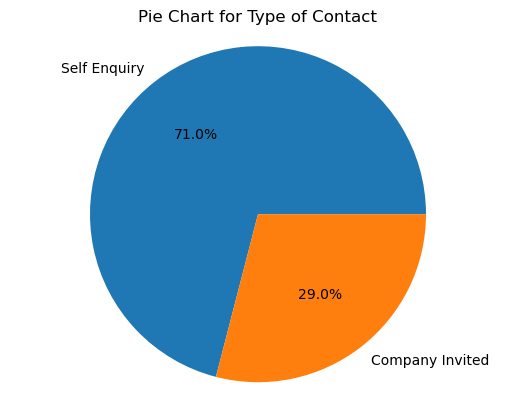

In [142]:
contact_counts = df['TypeofContact'].value_counts()

plt.figure()
plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart for Type of Contact')
plt.axis('equal')

plt.show()

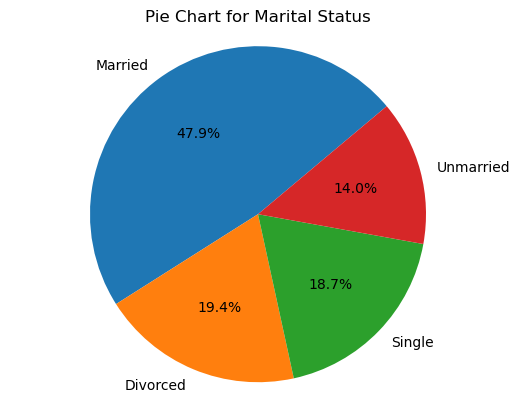

In [143]:
marital_status_counts = df['MaritalStatus'].value_counts()

plt.figure()
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=40)

plt.axis('equal')
plt.title('Pie Chart for Marital Status')

plt.show()

CustomerID                     Axes(0.125,0.712609;0.168478x0.167391)
ProdTaken                   Axes(0.327174,0.712609;0.168478x0.167391)
Age                         Axes(0.529348,0.712609;0.168478x0.167391)
CityTier                    Axes(0.731522,0.712609;0.168478x0.167391)
DurationOfPitch                Axes(0.125,0.511739;0.168478x0.167391)
NumberOfPersonVisiting      Axes(0.327174,0.511739;0.168478x0.167391)
NumberOfFollowups           Axes(0.529348,0.511739;0.168478x0.167391)
PreferredPropertyStar       Axes(0.731522,0.511739;0.168478x0.167391)
NumberOfTrips                   Axes(0.125,0.31087;0.168478x0.167391)
Passport                     Axes(0.327174,0.31087;0.168478x0.167391)
PitchSatisfactionScore       Axes(0.529348,0.31087;0.168478x0.167391)
OwnCar                       Axes(0.731522,0.31087;0.168478x0.167391)
NumberOfChildrenVisiting           Axes(0.125,0.11;0.168478x0.167391)
MonthlyIncome                   Axes(0.327174,0.11;0.168478x0.167391)
dtype: object

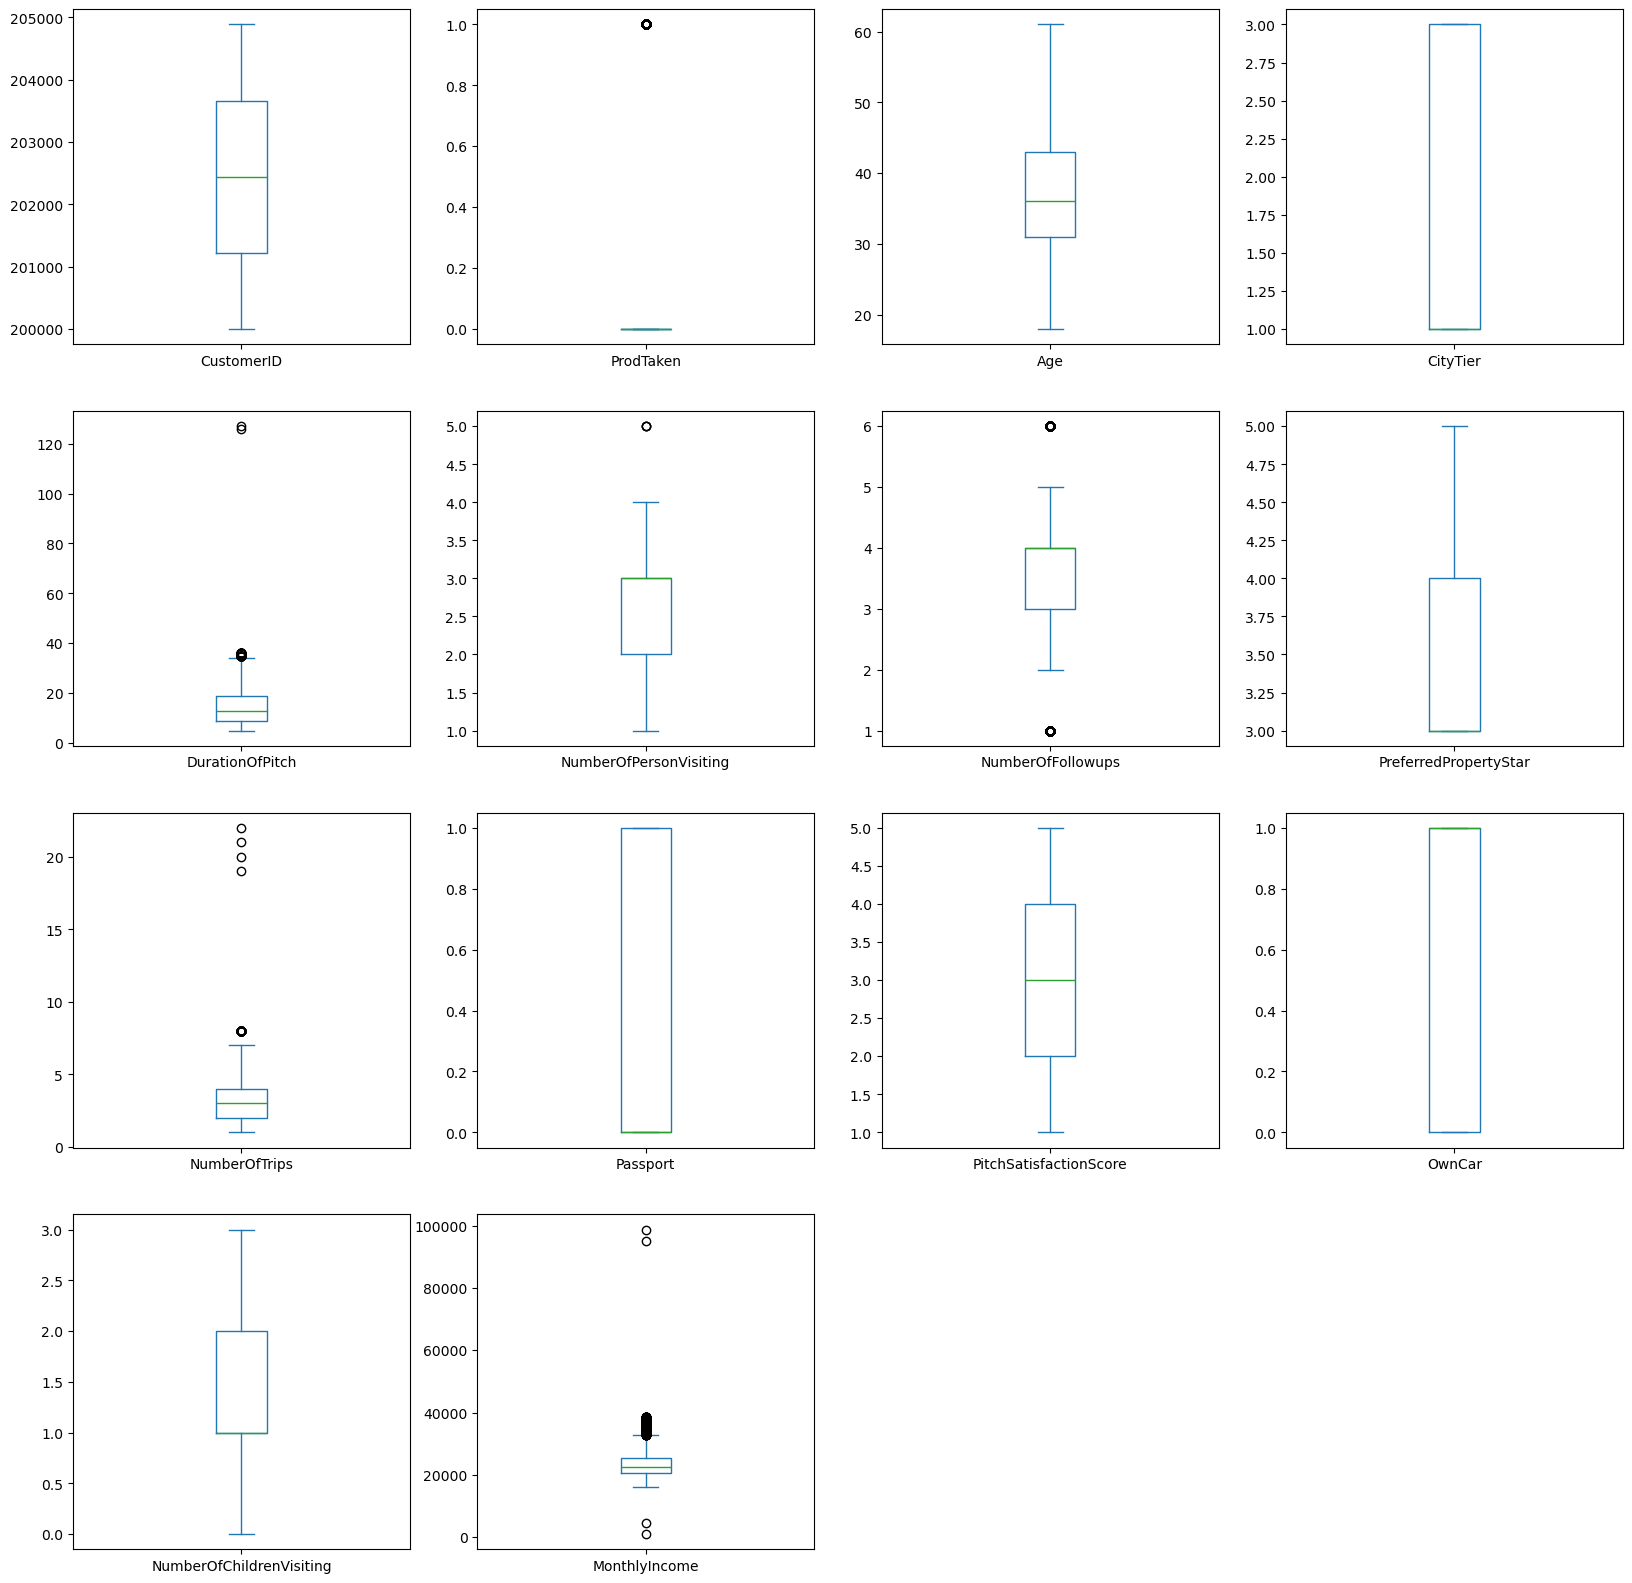

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
df.plot(kind = 'box' , subplots = True, layout = (4,4), figsize = (20,20))

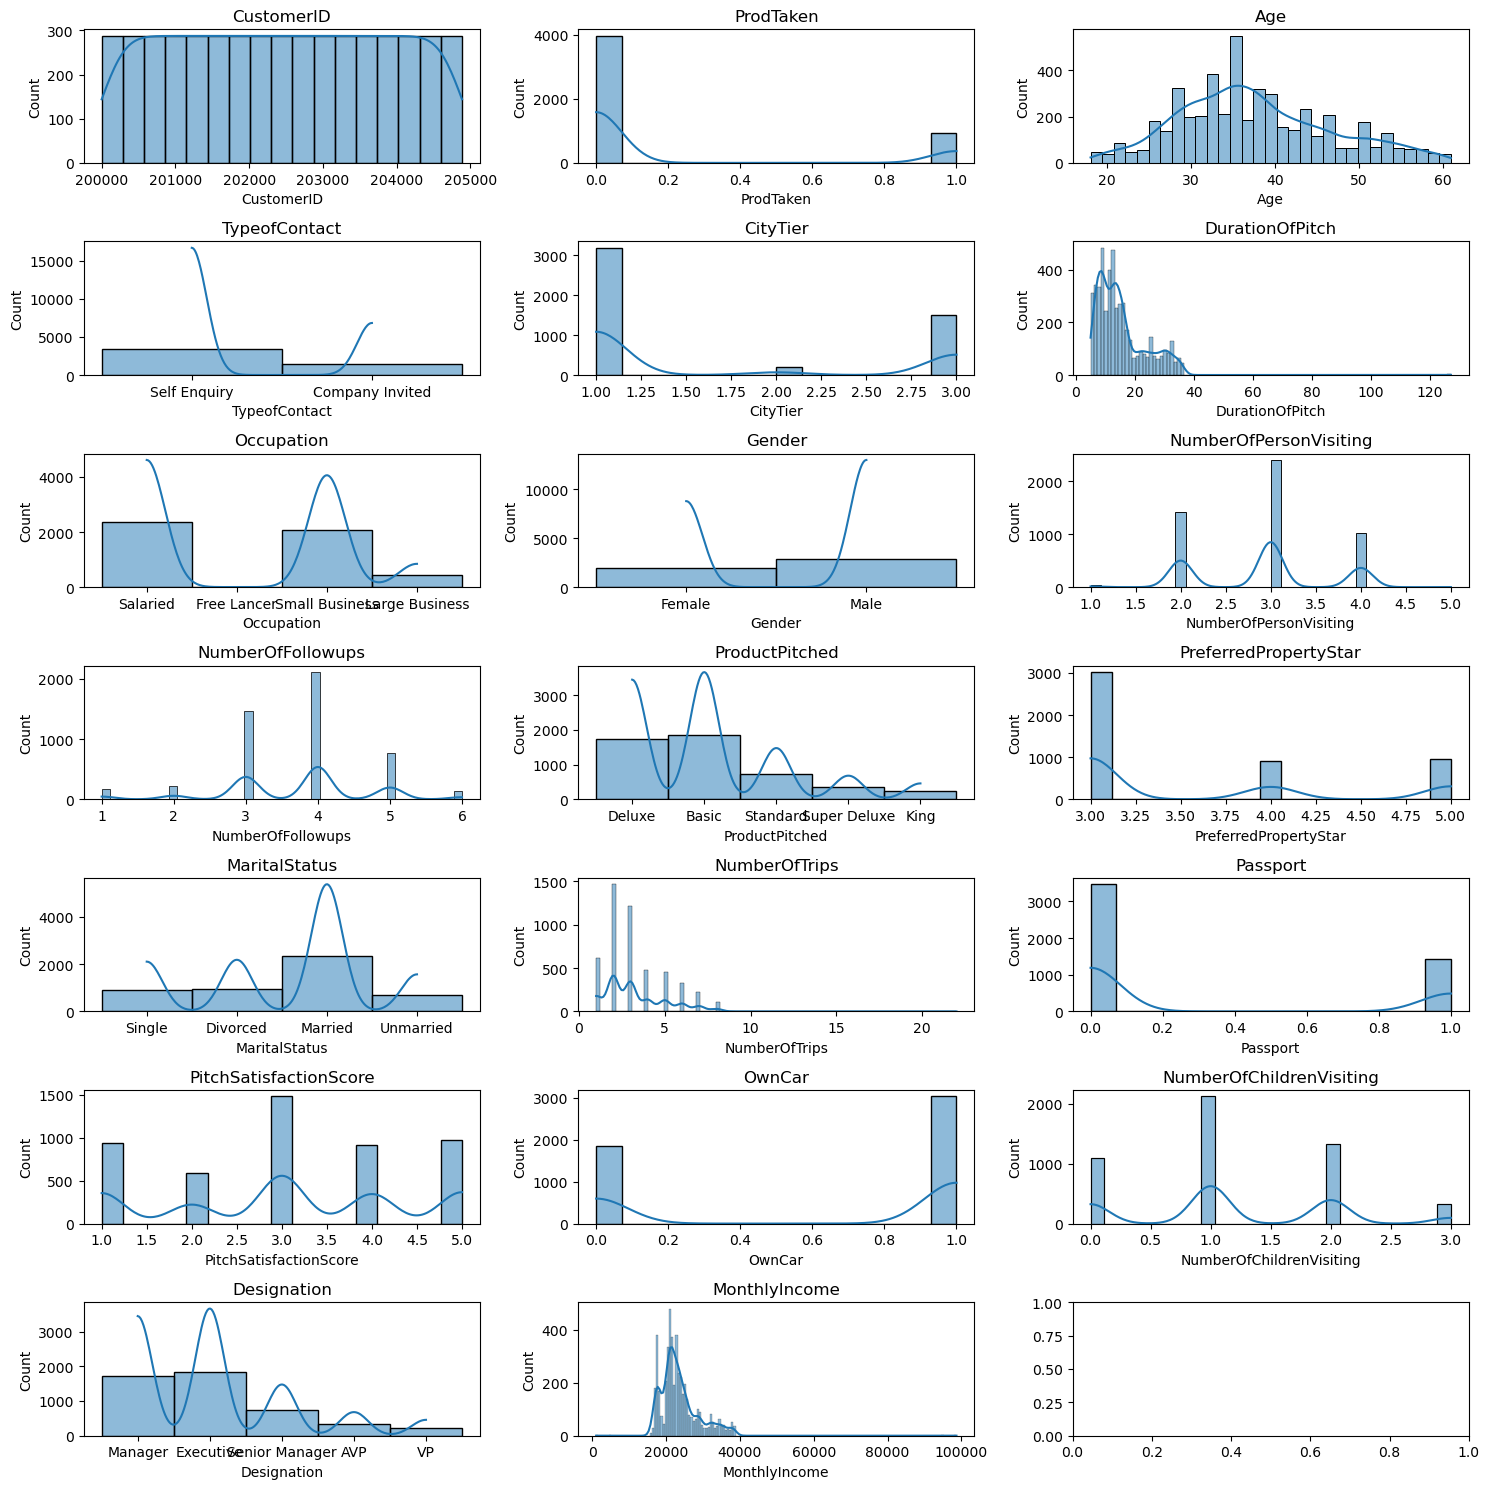

In [145]:
fig, axes = plt.subplots(7, 3, figsize=(15, 15))

axes = axes.flatten()

# Plot histogram with KDE for each column
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='ProdTaken', ylabel='count'>

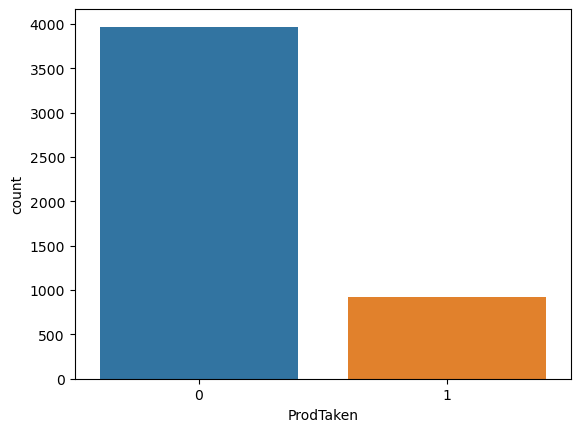

In [146]:
sns.countplot(x='ProdTaken', data=df)

<Axes: xlabel='Gender', ylabel='count'>

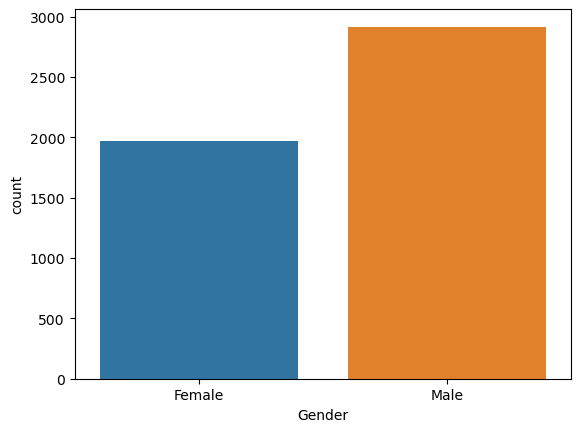

In [147]:
sns.countplot(x='Gender', data=df)

<Axes: xlabel='TypeofContact', ylabel='count'>

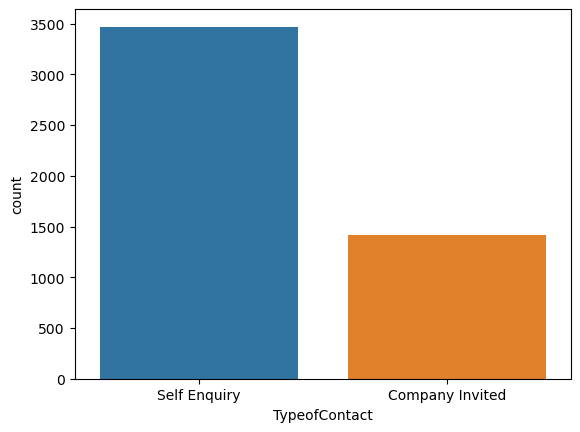

In [148]:
sns.countplot(x='TypeofContact', data=df)

<Axes: xlabel='Occupation', ylabel='count'>

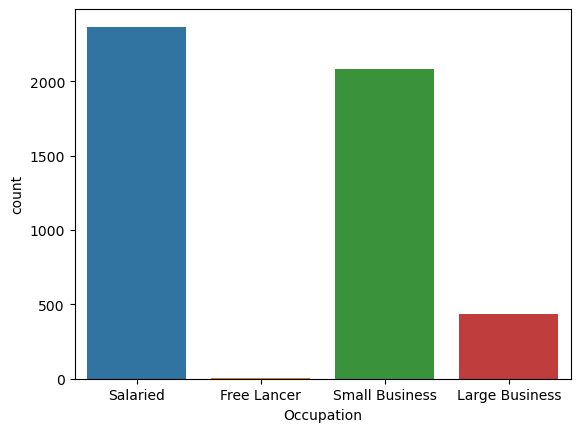

In [149]:
sns.countplot(x='Occupation', data=df)

<Axes: xlabel='ProductPitched', ylabel='count'>

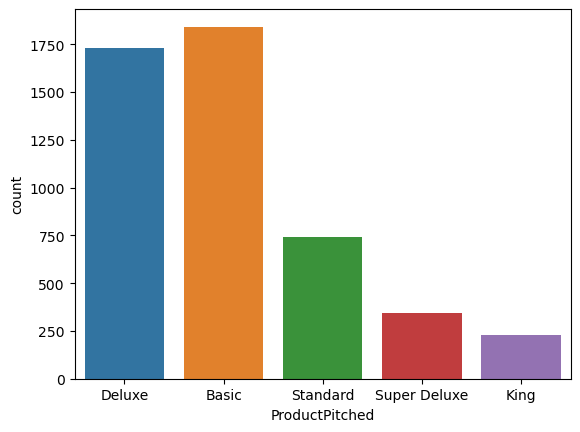

In [150]:
sns.countplot(x='ProductPitched', data=df)

<Axes: xlabel='MaritalStatus', ylabel='count'>

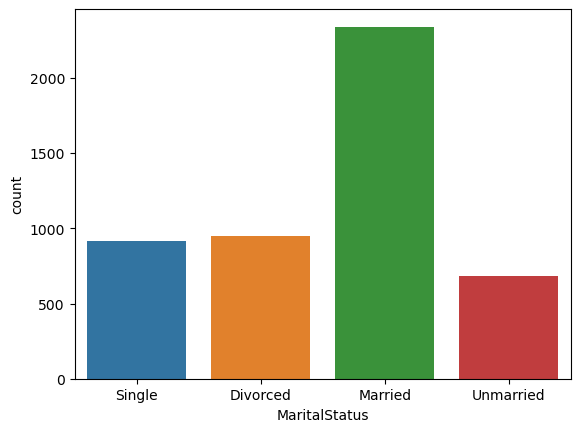

In [151]:
sns.countplot(x='MaritalStatus', data=df)

<Axes: xlabel='Designation', ylabel='count'>

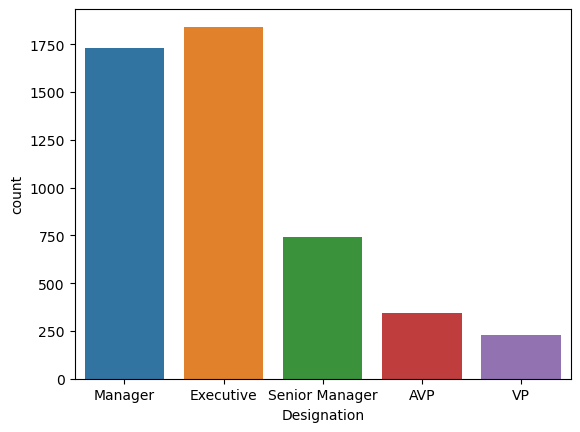

In [152]:
sns.countplot(x='Designation', data=df)

<Axes: >

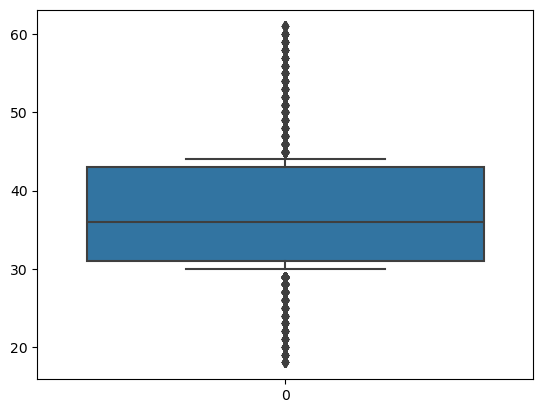

In [153]:
sns.boxplot(df["Age"],whis=0.100)

## Bivariate analysis

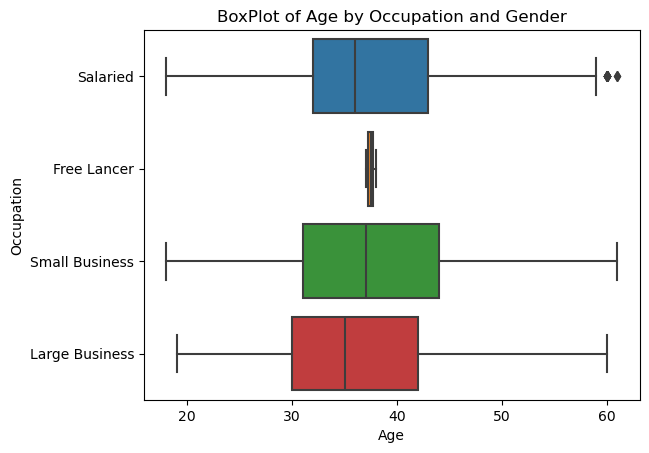

In [154]:
sns.boxplot(x='Age', y='Occupation', data=df)
plt.title('BoxPlot of Age by Occupation and Gender')
plt.show()

<Axes: title={'center': 'Passport'}, xlabel='ProdTaken'>

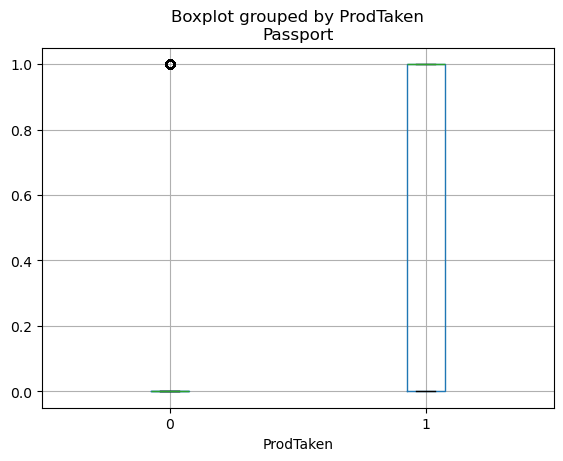

In [155]:
df.boxplot(by='ProdTaken', column='Passport')

<Axes: title={'center': 'NumberOfFollowups'}, xlabel='ProdTaken'>

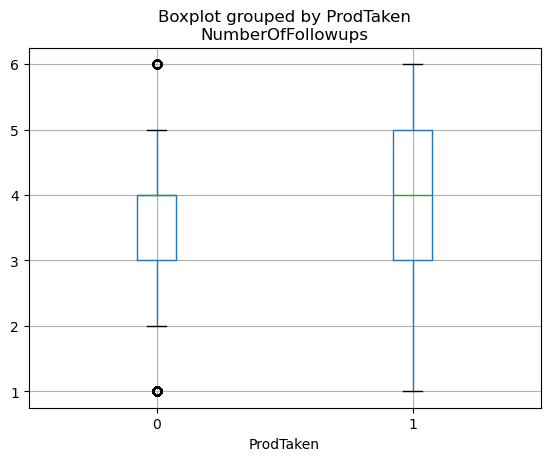

In [156]:
df.boxplot(by='ProdTaken', column='NumberOfFollowups')

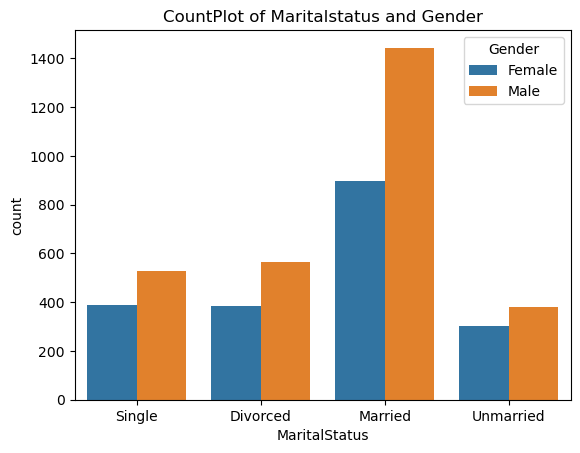

In [157]:
sns.countplot(x='MaritalStatus', hue='Gender', data=df)
plt.title('CountPlot of Maritalstatus and Gender')
plt.show()

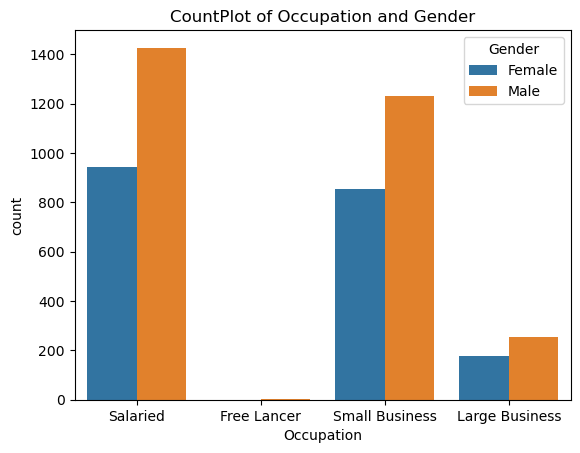

In [158]:
sns.countplot(x='Occupation', hue='Gender', data=df)
plt.title('CountPlot of Occupation and Gender')
plt.show()

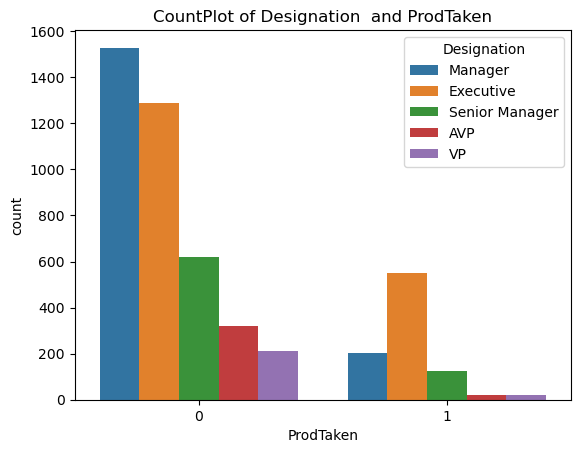

In [159]:
sns.countplot(x='ProdTaken', hue='Designation', data=df)
plt.title('CountPlot of Designation  and ProdTaken')
plt.show()

In [160]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

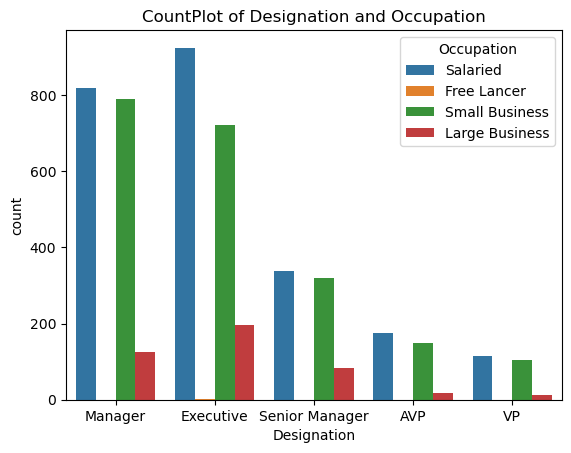

In [161]:
sns.countplot(x='Designation',hue='Occupation',data=df)
plt.title('CountPlot of Designation and Occupation')
plt.show()

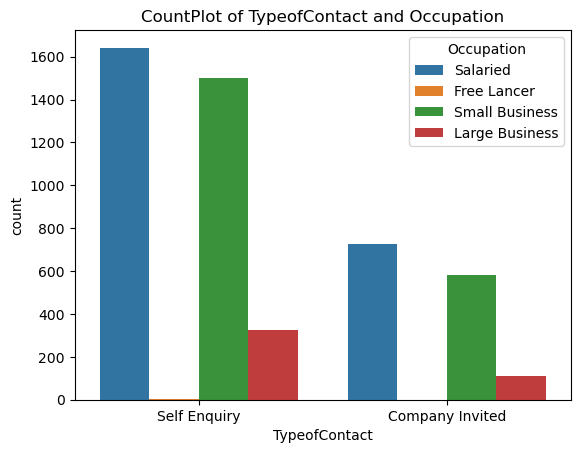

In [162]:
sns.countplot(x='TypeofContact',hue='Occupation',data=df)
plt.title('CountPlot of TypeofContact and Occupation')
plt.show()

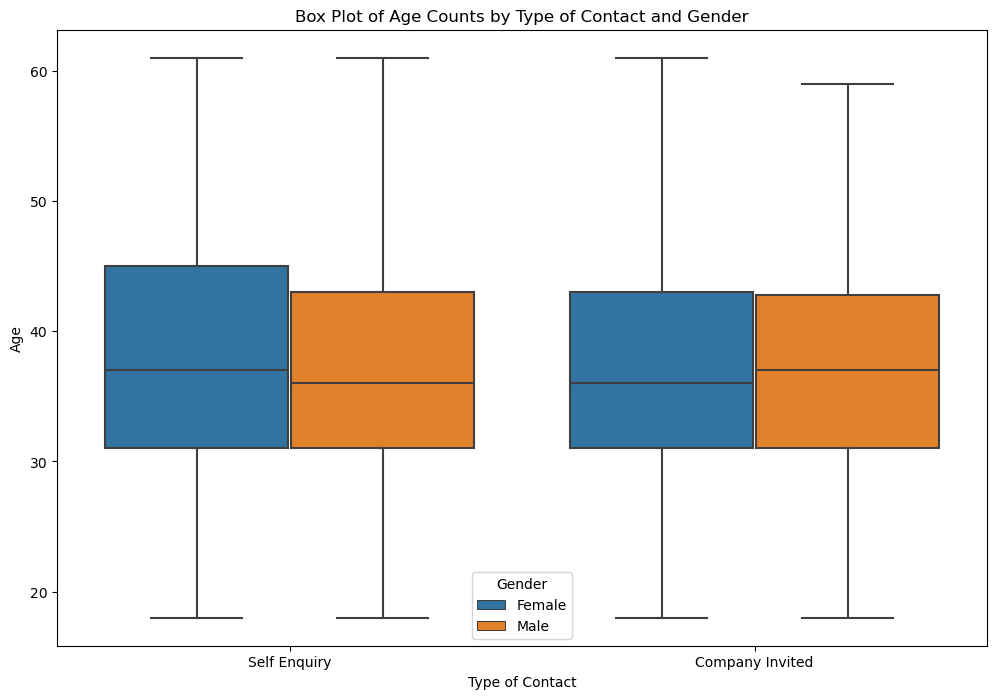

In [163]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="TypeofContact", y="Age", hue="Gender")
plt.title("Box Plot of Age Counts by Type of Contact and Gender")
plt.xlabel("Type of Contact")
plt.ylabel("Age")
plt.show()

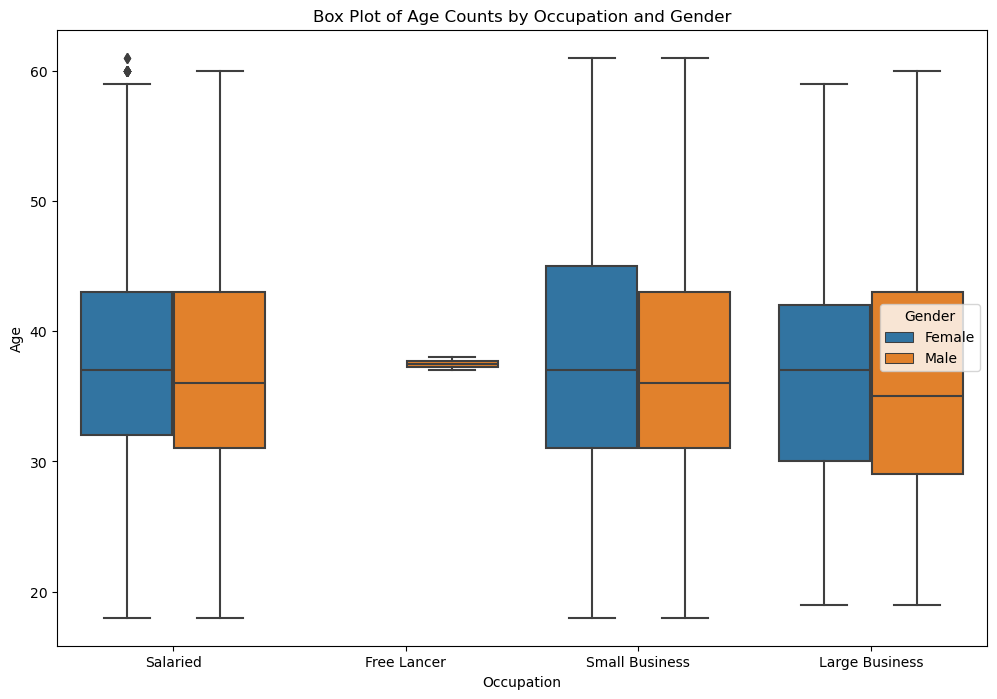

In [164]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Occupation", y="Age", hue="Gender")
plt.title("Box Plot of Age Counts by Occupation and Gender")
plt.xlabel("Occupation")
plt.ylabel("Age")
plt.show()


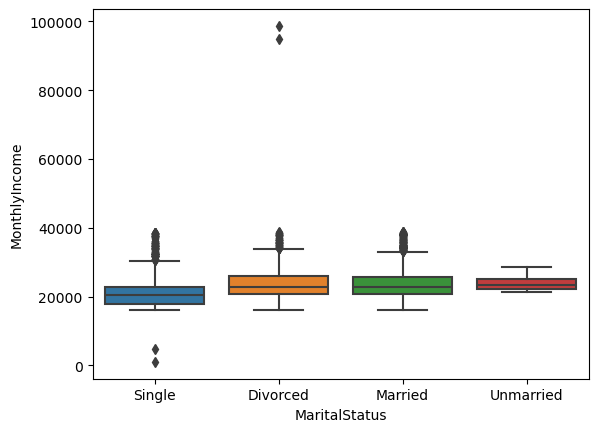

In [165]:
sns.boxplot(x='MaritalStatus', y='MonthlyIncome', data=df)
plt.show()

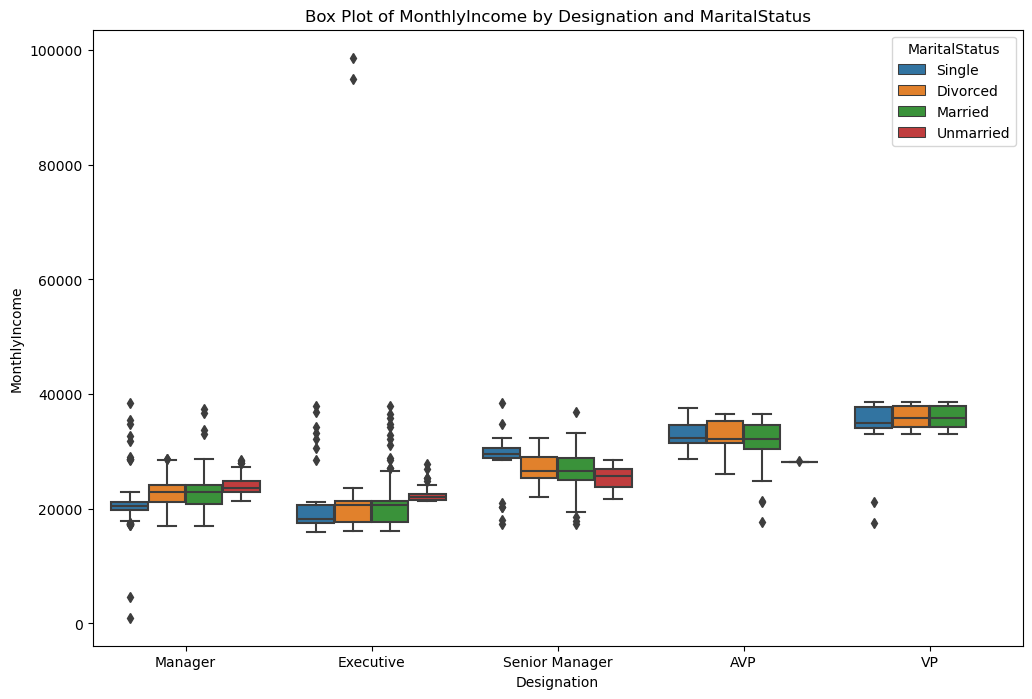

In [166]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Designation", y="MonthlyIncome", hue="MaritalStatus")
plt.title("Box Plot of MonthlyIncome by Designation and MaritalStatus")
plt.xlabel("Designation")
plt.ylabel("MonthlyIncome")
plt.show()


## Categorical Vs Categorical

<Figure size 2000x500 with 0 Axes>

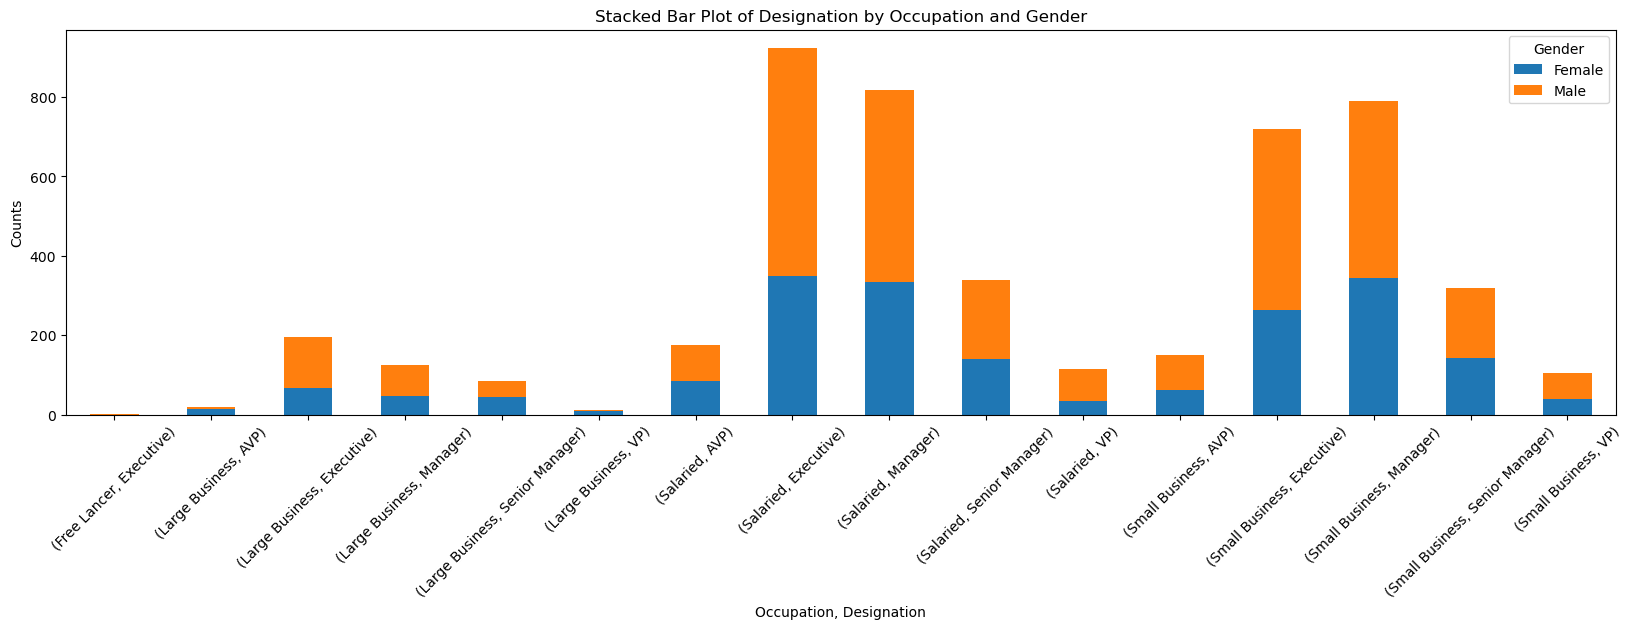

In [167]:
cross_tab = pd.crosstab(index=[df['Occupation'], df['Designation']], columns=df['Gender'])

plt.figure(figsize=(20, 5))
cross_tab.plot(kind='bar', stacked=True, figsize=(20, 5))
plt.title('Stacked Bar Plot of Designation by Occupation and Gender')
plt.xlabel('Occupation, Designation')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()

<Figure size 2000x800 with 0 Axes>

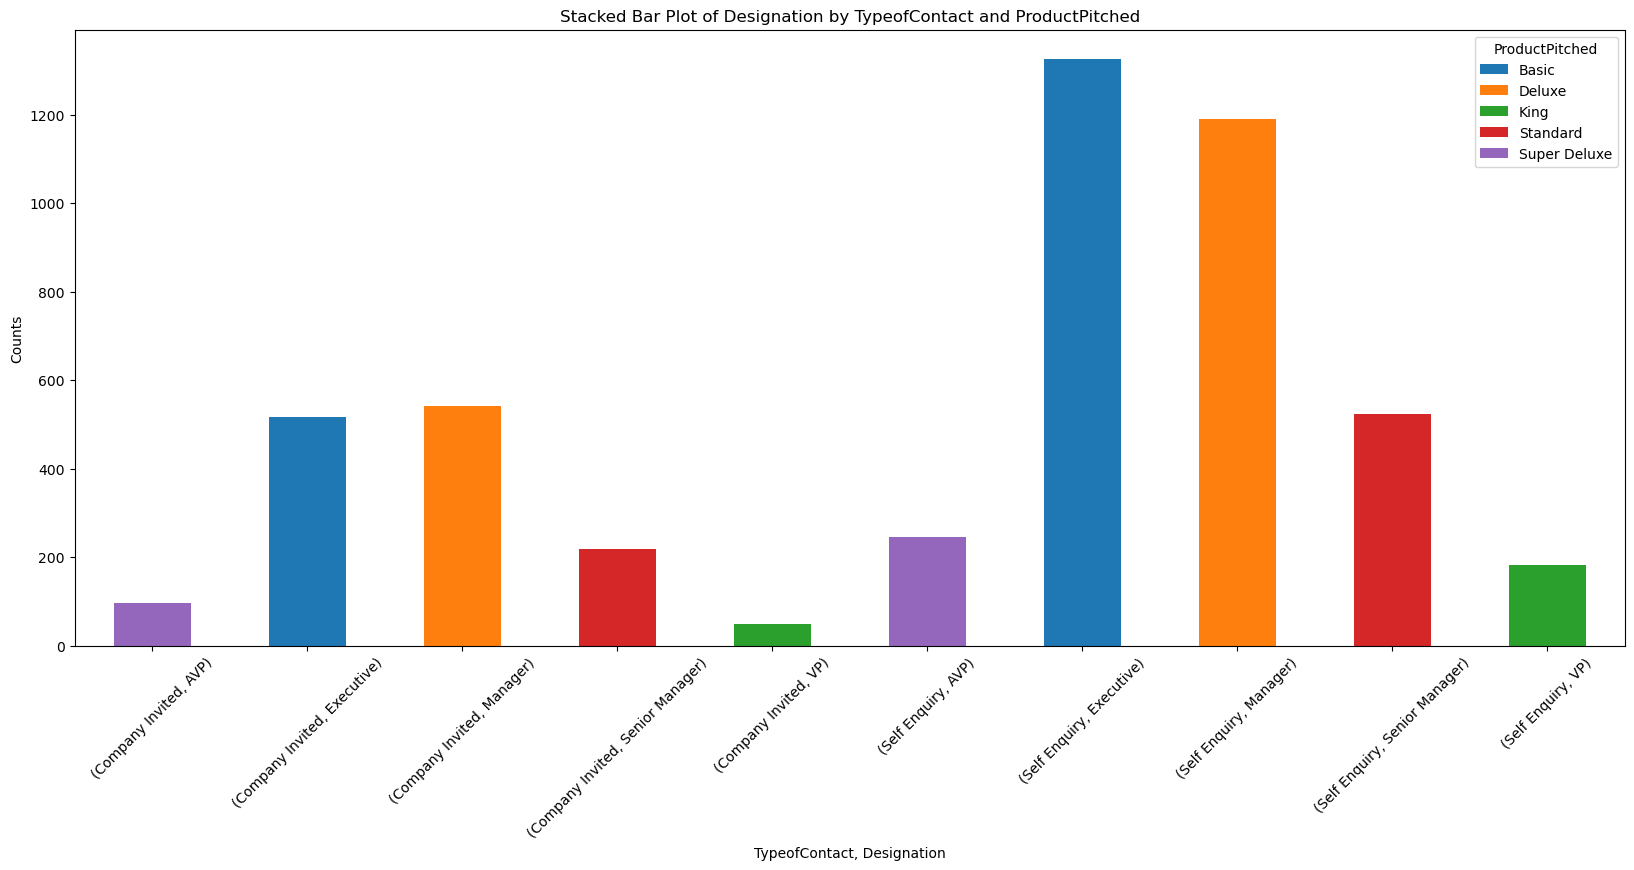

In [168]:
cross_tab = pd.crosstab(index=[df['TypeofContact'], df['Designation']], columns=df['ProductPitched'])

plt.figure(figsize=(20, 8))
cross_tab.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.title('Stacked Bar Plot of Designation by TypeofContact and ProductPitched')
plt.xlabel('TypeofContact, Designation')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='ProductPitched', loc='upper right')
plt.show()

<Figure size 2000x1000 with 0 Axes>

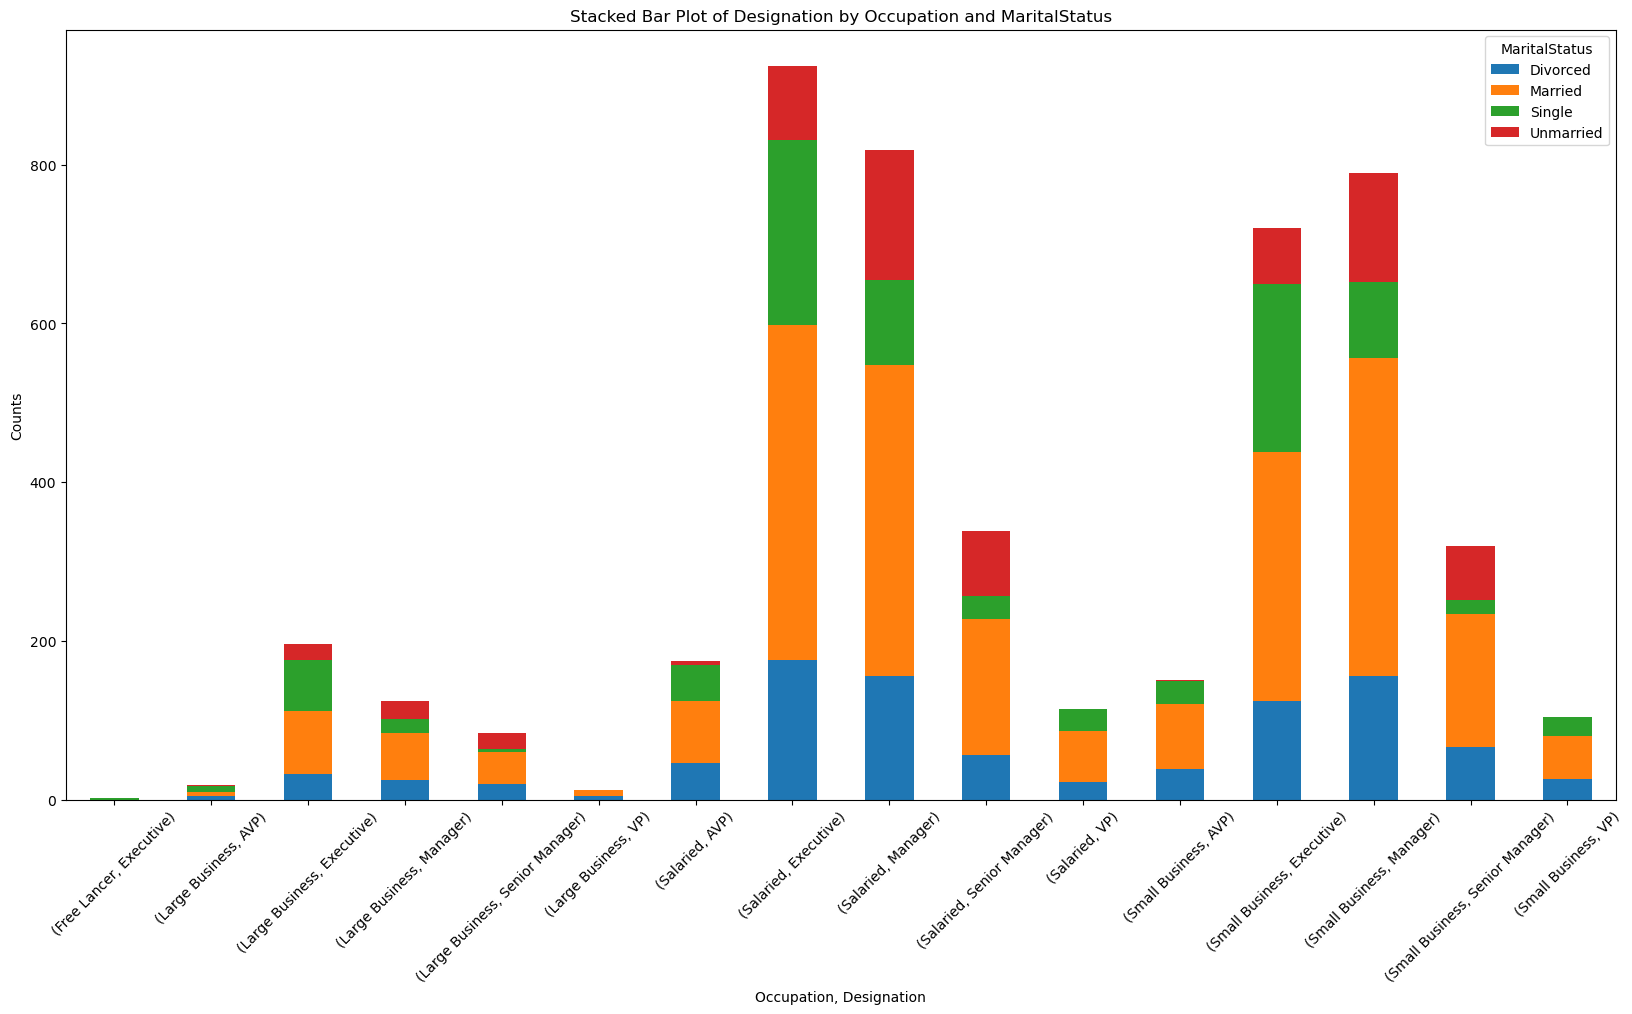

In [169]:
cross_tab = pd.crosstab(index=[df['Occupation'], df['Designation']], columns=df['MaritalStatus'])

plt.figure(figsize=(20, 10))
cross_tab.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Stacked Bar Plot of Designation by Occupation and MaritalStatus')
plt.xlabel('Occupation, Designation')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='MaritalStatus', loc='upper right')
plt.show()


In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [171]:
df.head().T

,0,1,2,3,4
CustomerID,200000,200001,200002,200003,200004
ProdTaken,1,0,1,0,0
Age,41,49,37,33,38
TypeofContact,Self Enquiry,Company Invited,Self Enquiry,Company Invited,Self Enquiry
CityTier,3,1,1,1,1
DurationOfPitch,6,14,8,9,8
Occupation,Salaried,Salaried,Free Lancer,Salaried,Small Business
Gender,Female,Male,Male,Female,Male
NumberOfPersonVisiting,3,3,3,2,2
NumberOfFollowups,3,4,4,3,3


In [172]:
## Dimensionality check

df.shape

(4888, 20)

## Observation - Here we can see the dataset contains rows- 4888 and columns- 20 using shape parameter

In [173]:
## Column data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CustomerID                4888 non-null   int64 
 1   ProdTaken                 4888 non-null   int64 
 2   Age                       4888 non-null   int32 
 3   TypeofContact             4888 non-null   object
 4   CityTier                  4888 non-null   int64 
 5   DurationOfPitch           4888 non-null   int32 
 6   Occupation                4888 non-null   object
 7   Gender                    4888 non-null   object
 8   NumberOfPersonVisiting    4888 non-null   int64 
 9   NumberOfFollowups         4888 non-null   int32 
 10  ProductPitched            4888 non-null   object
 11  PreferredPropertyStar     4888 non-null   int32 
 12  MaritalStatus             4888 non-null   object
 13  NumberOfTrips             4888 non-null   int32 
 14  Passport                

In [174]:
## Checking null values

df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [176]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,202443.500000,0.188216,37.589403,1.654255,15.362930,2.905074,3.711129,3.577946,3.229746,0.290917,3.078151,0.620295,1.180646,23546.843903
std,1411.188388,0.390925,9.104928,0.916583,8.316166,0.724891,0.998271,0.797005,1.822769,0.454232,1.365792,0.485363,0.855595,5266.279293
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20485.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22413.500000
75%,203665.250000,0.000000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25424.750000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [177]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.589403,9.104928,18.0,31.00,36.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.00,13.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [178]:
df.describe(include='object')

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4888,4888,4888,4888,4888,4888
unique,2,4,2,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3469,2368,2916,1842,2340,1842


In [181]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

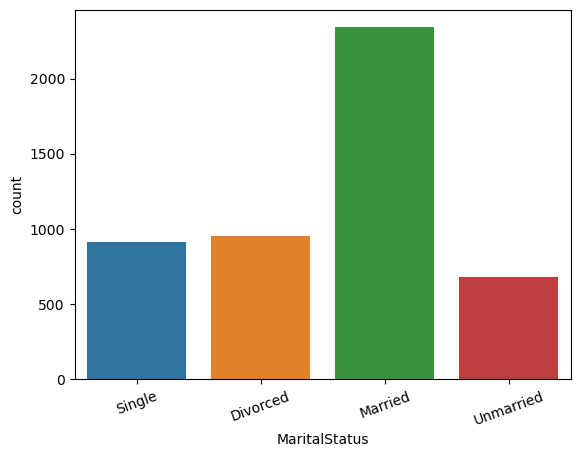

In [182]:
plt.figsize=(10,30)
sns.countplot(x='MaritalStatus',data=df)
plt.xticks(rotation=20)

plt.show()

<Axes: xlabel='NumberOfChildrenVisiting', ylabel='Count'>

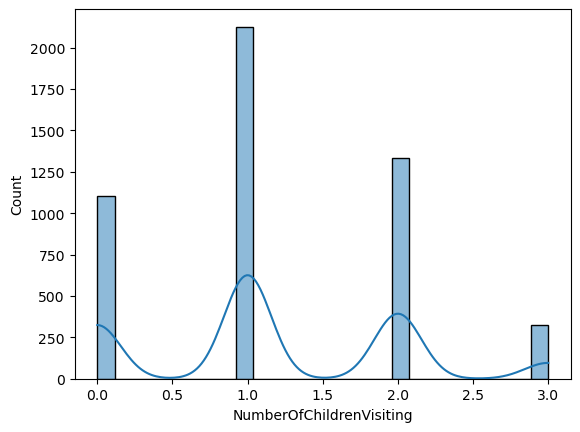

In [184]:
sns.histplot(data=df, x='NumberOfChildrenVisiting',kde=True)

In [185]:
pd.crosstab(df['ProdTaken'], df['NumberOfPersonVisiting'],margins=True)#.plot(kind='bar')

NumberOfPersonVisiting,1,2,3,4,5,All
ProdTaken,,,,,,
0,39,1151,1942,833,3,3968
1,0,267,460,193,0,920
All,39,1418,2402,1026,3,4888


In [186]:
df['CityTier'].describe().T

count    4888.000000
mean        1.654255
std         0.916583
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         3.000000
Name: CityTier, dtype: float64

In [190]:
df.groupby('OwnCar')['NumberOfTrips'].describe()

,count,mean,std,min,25%,50%,75%,max
OwnCar,,,,,,,,
0,1856.0,3.258082,1.756525,1.0,2.0,3.0,4.0,8.0
1,3032.0,3.212401,1.862231,1.0,2.0,3.0,4.0,22.0


# Step - 2: Document the below mentioned points properly:

#### 1.Identify the input and output/target variables.
#### 2.Identify the type of ML Task.
#### 3.Identify the Evaluation Metric.
#### 4.For regression task - Mean Absolute Error
#### 5.For classification task - Accuracy

In [191]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='ProdTaken'>

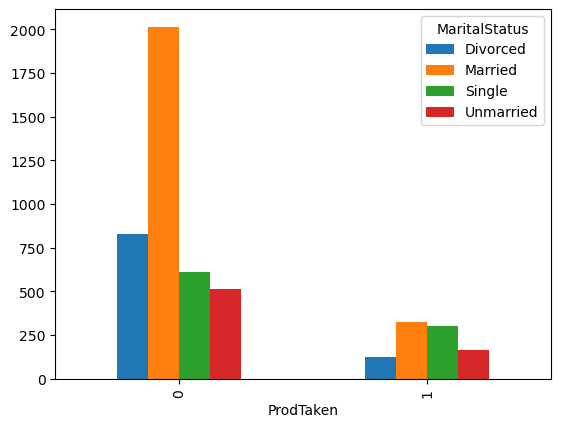

In [192]:
tab = pd.crosstab(df['ProdTaken'], df['MaritalStatus'])

tab.plot(kind='bar')

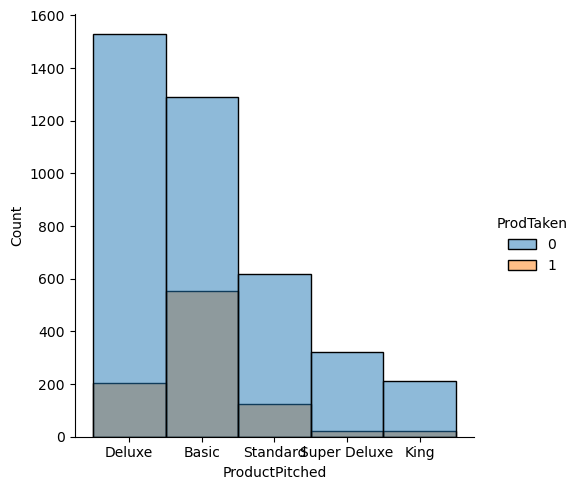

In [196]:
sns.displot(data=df,x='ProductPitched',hue='ProdTaken')

## 1. Identify the input and output/target variables.

In [197]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [198]:
# Identifying the inputs variables as (X) and target variable as (y)

y = df['ProdTaken']

X = df.drop('ProdTaken', axis = 'columns')

In [199]:
X.head()


,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,200001,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,200002,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,200003,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,200004,38,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468


In [200]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: ProdTaken, dtype: int64

## Observation - As per the dataset our task is to find (default or non default) here's the column have information about defaulter which is ProdTaken so this is our target variable and rest of the columns are input variables

## 2. Identify the type of ML Task.

In [201]:
df['ProdTaken'].value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

## Observation - As per the dataset the target variable is loan status which in binary classification (i.e - 0 non default or 1 default) so here our ML task is classification.

### 3. Identify the Evaluation Metric.

In [202]:
df['ProdTaken'].value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

# Observation - As per the observation our ML task is classification so here Evaluation Metric is Accuracy

## Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [203]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

In [204]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3666, 19) (3666,)
(1222, 19) (1222,)


# Step - 4: Data preparation on train data:

### For Numerical Variables - Standardization or Normalization (Fit and Transform)
### For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

# Separating Categorical and Numerical Columns of Training set:

In [205]:
X_train.dtypes

CustomerID                   int64
Age                          int32
TypeofContact               object
CityTier                     int64
DurationOfPitch              int32
Occupation                  object
Gender                      object
NumberOfPersonVisiting       int64
NumberOfFollowups            int32
ProductPitched              object
PreferredPropertyStar        int32
MaritalStatus               object
NumberOfTrips                int32
Passport                     int64
PitchSatisfactionScore       int64
OwnCar                       int64
NumberOfChildrenVisiting     int32
Designation                 object
MonthlyIncome                int32
dtype: object

In [206]:
X_train_num = X_train.select_dtypes(include = ['int64','float64'])

X_train_num.head()

,CustomerID,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar
3129,203129,3,3,0,3,1
1328,201328,3,2,0,1,1
3237,203237,1,3,0,4,1
576,200576,3,2,0,3,0
836,200836,3,2,0,3,0


In [207]:
# scaling the numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,CustomerID,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar
3129,0.491351,1.482822,0.121985,-0.654314,-0.053300,0.779676
1328,-0.789524,1.482822,-1.271148,-0.654314,-1.511492,0.779676
3237,0.568161,-0.710450,0.121985,-0.654314,0.675796,0.779676
576,-1.324348,1.482822,-1.271148,-0.654314,-0.053300,-1.282584
836,-1.139436,1.482822,-1.271148,-0.654314,-0.053300,-1.282584


In [208]:
X_train_cat = X_train.select_dtypes(include = ['object'])

X_train_cat.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
3129,Company Invited,Small Business,Male,Deluxe,Unmarried,Manager
1328,Self Enquiry,Small Business,Female,Deluxe,Married,Manager
3237,Self Enquiry,Salaried,Male,Basic,Married,Executive
576,Self Enquiry,Small Business,Male,Deluxe,Divorced,Manager
836,Self Enquiry,Salaried,Female,Standard,Divorced,Senior Manager


# Ordinal encoding to the Categorical Features

In [209]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder(categories = 'auto', handle_unknown='use_encoded_value',unknown_value=-1,encoded_missing_value=-5)
X_train_cat_trans=pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat),
                               columns=ordinal_encoder.get_feature_names_out(),
                               index=X_train_cat.index)

                               
print(X_train_cat_trans.shape)


(3666, 6)


In [210]:
X_train_cat_trans.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
3129,0.0,3.0,1.0,1.0,3.0,2.0
1328,1.0,3.0,0.0,1.0,1.0,2.0
3237,1.0,2.0,1.0,0.0,1.0,1.0
576,1.0,3.0,1.0,1.0,0.0,2.0
836,1.0,2.0,0.0,3.0,0.0,3.0


In [211]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_trans], axis = 1)

X_train_transformed#.head()

,CustomerID,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
3129,0.491351,1.482822,0.121985,-0.654314,-0.053300,0.779676,0.0,3.0,1.0,1.0,3.0,2.0
1328,-0.789524,1.482822,-1.271148,-0.654314,-1.511492,0.779676,1.0,3.0,0.0,1.0,1.0,2.0
3237,0.568161,-0.710450,0.121985,-0.654314,0.675796,0.779676,1.0,2.0,1.0,0.0,1.0,1.0
576,-1.324348,1.482822,-1.271148,-0.654314,-0.053300,-1.282584,1.0,3.0,1.0,1.0,0.0,2.0
836,-1.139436,1.482822,-1.271148,-0.654314,-0.053300,-1.282584,1.0,2.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4859,1.721731,1.482822,0.121985,1.528319,-0.053300,0.779676,0.0,2.0,1.0,1.0,2.0,2.0
3264,0.587364,1.482822,0.121985,-0.654314,1.404892,-1.282584,0.0,3.0,1.0,1.0,1.0,2.0
1653,-0.558383,-0.710450,-1.271148,-0.654314,-0.053300,0.779676,1.0,3.0,1.0,0.0,1.0,1.0
2607,0.120104,-0.710450,0.121985,1.528319,0.675796,0.779676,1.0,2.0,1.0,3.0,1.0,3.0


# Step - 5: Data preparation on train data:
### For Numerical Variables - Standardization (Transform)
### For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

In [218]:
X_train_num.head()

,CustomerID,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar
3129,203129,3,3,0,3,1
1328,201328,3,2,0,1,1
3237,203237,1,3,0,4,1
576,200576,3,2,0,3,0
836,200836,3,2,0,3,0


# Numerical Feature Transformation:Applying Normalization

In [219]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train_num), 
                                    columns = minmax_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,CustomerID,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar
3129,0.640270,1.0,0.50,0.0,0.50,1.0
1328,0.271741,1.0,0.25,0.0,0.00,1.0
3237,0.662370,0.0,0.50,0.0,0.75,1.0
576,0.117864,1.0,0.25,0.0,0.50,0.0
836,0.171066,1.0,0.25,0.0,0.50,0.0


In [220]:
print("Number of Numerical Features:", minmax_scaler.n_features_in_)
print("Output Feature Names:", minmax_scaler.get_feature_names_out())
print("Minimum of each column:", minmax_scaler.data_min_)
print("Maximum of each column:", minmax_scaler.data_max_)

Number of Numerical Features: 6
Output Feature Names: ['CustomerID' 'CityTier' 'NumberOfPersonVisiting' 'Passport'
 'PitchSatisfactionScore' 'OwnCar']
Minimum of each column: [2.e+05 1.e+00 1.e+00 0.e+00 1.e+00 0.e+00]
Maximum of each column: [2.04887e+05 3.00000e+00 5.00000e+00 1.00000e+00 5.00000e+00 1.00000e+00]


In [221]:
X_train_num_transformed.describe().round(2)

,CustomerID,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar
count,3666.00,3666.00,3666.00,3666.00,3666.00,3666.00
mean,0.50,0.32,0.48,0.30,0.52,0.62
std,0.29,0.46,0.18,0.46,0.34,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.00,0.25,0.00,0.25,0.00
50%,0.50,0.00,0.50,0.00,0.50,1.00
75%,0.75,1.00,0.50,1.00,0.75,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00


In [212]:
X_test_num = X_test.select_dtypes(include = ['int64','float64'])

X_test_num


,CustomerID,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar
751,200751,3,3,0,2,1
3314,203314,3,4,1,3,1
1220,201220,3,2,0,4,1
1362,201362,1,2,0,1,1
3289,203289,1,4,1,2,1
...,...,...,...,...,...,...
2526,202526,3,4,0,2,0
2612,202612,3,3,0,2,1
1021,201021,3,3,0,1,1
3429,203429,1,4,1,5,1


In [213]:
# Scaling the Numericals Features for test

X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,CustomerID,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar
751,-1.199888,1.482822,0.121985,-0.654314,-0.782396,0.779676
3314,0.622924,1.482822,1.515118,1.528319,-0.053300,0.779676
1220,-0.866334,1.482822,-1.271148,-0.654314,0.675796,0.779676
1362,-0.765343,-0.710450,-1.271148,-0.654314,-1.511492,0.779676
3289,0.605144,-0.710450,1.515118,1.528319,-0.782396,0.779676


In [214]:
X_test_cat = X_test.select_dtypes(include = ['object'])

X_test_cat.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
751,Company Invited,Salaried,Female,Deluxe,Divorced,Manager
3314,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager
1220,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1362,Company Invited,Small Business,Male,Deluxe,Single,Manager
3289,Company Invited,Small Business,Female,Deluxe,Divorced,Manager


# Ordinal encoding to the Categorical Features

In [215]:
X_test_cat_trans=pd.DataFrame(ordinal_encoder.transform(X_test_cat),
                               columns=ordinal_encoder.get_feature_names_out(),
                               index=X_test_cat.index)

                               
print(X_test_cat_trans.shape)

(1222, 6)


In [216]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_trans], axis = 1)

X_test_transformed.head()

,CustomerID,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
751,-1.199888,1.482822,0.121985,-0.654314,-0.782396,0.779676,0.0,2.0,0.0,1.0,0.0,2.0
3314,0.622924,1.482822,1.515118,1.528319,-0.053300,0.779676,1.0,2.0,1.0,1.0,0.0,2.0
1220,-0.866334,1.482822,-1.271148,-0.654314,0.675796,0.779676,1.0,2.0,0.0,1.0,2.0,2.0
1362,-0.765343,-0.710450,-1.271148,-0.654314,-1.511492,0.779676,0.0,3.0,1.0,1.0,2.0,2.0
3289,0.605144,-0.710450,1.515118,1.528319,-0.782396,0.779676,0.0,3.0,0.0,1.0,0.0,2.0


# Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
#### 1.KNN
#### 2.Logistic Regression
#### 3.Support Vector Machines
#### 4.Decision Trees
#### 5.Random Forest
# Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy(actual, predict).

# 1. KNN classifier

In [217]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [226]:
import time

In [227]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
start_time=time.time()

knn.fit(X_train_transformed, y_train)
end_time=time.time()
knn_time=end_time-start_time

start_time=time.time()
y_test_pred = knn.predict(X_test_transformed)
end_time=time.time()
knn_predict_time=end_time-start_time
y_train_pred = knn.predict(X_train_transformed)

knn_ac_test = accuracy_score(y_test, y_test_pred)

knn_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", knn_ac_train)
print("Test Accuracy ", knn_ac_test)
print("Time taken for learning:",knn_time)
print("Time taken for predicting", knn_predict_time)

Training Accuracy :  0.8835242771412984
Test Accuracy  0.8248772504091653
Time taken for learning: 0.015621662139892578
Time taken for predicting 0.1419506072998047


# 2. Logestic Regresion

In [228]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
start_time=time.time()

lr.fit(X_train_transformed, y_train)
end_time=time.time()
lr_time=end_time-start_time

start_time=time.time()
y_test_pred = lr.predict(X_test_transformed)
end_time=time.time()
lr_predict_time=end_time-start_time

y_train_pred = lr.predict(X_train_transformed)

lr_ac_test = accuracy_score(y_test, y_test_pred)

lr_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", lr_ac_train)
print("Test Accuracy ", lr_ac_test)
print("Time taken to learn:",lr_time)
print("Time taken to predict:",lr_predict_time)

Training Accuracy :  0.82924168030551
Test Accuracy  0.8330605564648118
Time taken to learn: 0.027300596237182617
Time taken to predict: 0.001462697982788086


# 3. Support Vector Machine

In [230]:
from sklearn.svm import SVC

svm = SVC()
start_time=time.time()
svm.fit(X_train_transformed, y_train)
end_time=time.time()
svm_time = end_time-start_time

start_time=time.time()
y_test_pred = svm.predict(X_test_transformed)
end_time=time.time()
svm_predict_time=end_time-start_time

y_train_pred = svm.predict(X_train_transformed)

svm_ac_test = accuracy_score(y_test, y_test_pred)

svm_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", svm_ac_train)
print("Test Accuracy ", svm_ac_test)
print("Time taken to learn:",svm_time)
print("Time taken to predict:",svm_predict_time)

Training Accuracy :  0.8472449536279324
Test Accuracy  0.8379705400981997
Time taken to learn: 0.39842796325683594
Time taken to predict: 0.29905200004577637


# 4. Decision Tree

In [231]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
start_time=time.time()
dt.fit(X_train_transformed, y_train)
end_time=time.time()
dt_time=end_time-start_time

start_time=time.time()
y_test_pred = dt.predict(X_test_transformed)
end_time=time.time()
dt_predict_time=end_time-start_time

y_train_pred = dt.predict(X_train_transformed)

dt_ac_test = accuracy_score(y_test, y_test_pred)

dt_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", dt_ac_train)
print("Test Accuracy ", dt_ac_test)
print("Time taken to Learn:",dt_time)
print("Time taken to predict:",dt_predict_time)


Training Accuracy :  1.0
Test Accuracy  0.8126022913256956
Time taken to Learn: 0.019107341766357422
Time taken to predict: 0.001992940902709961


# 5. Random Forest

In [232]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
start_time=time.time()
rf.fit(X_train_transformed, y_train)
end_time=time.time()
rf_time=end_time-start_time

start_time=time.time()
y_test_pred = rf.predict(X_test_transformed)
end_time=time.time()
rf_predict_time=end_time-start_time

y_train_pred = rf.predict(X_train_transformed)

rf_ac_test = accuracy_score(y_test, y_test_pred)

rf_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", rf_ac_train)
print("Test Accuracy ", rf_ac_test)
print("Time_taken to predict:",rf_time)
print("Time taken to predict:",rf_predict_time)

Training Accuracy :  1.0
Test Accuracy  0.8543371522094927
Time_taken to predict: 0.46224331855773926
Time taken to predict: 0.049748897552490234


# Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm

In [233]:
x = {'K Nearest Neighbour': knn_ac_test, 'Logistic Regression' : lr_ac_test, 'Support Vector Machine' : svm_ac_test,'Decision tree' : dt_ac_test, 'Random Forest' : rf_ac_test}

x

{'K Nearest Neighbour': 0.8248772504091653,
 'Logistic Regression': 0.8330605564648118,
 'Support Vector Machine': 0.8379705400981997,
 'Decision tree': 0.8126022913256956,
 'Random Forest': 0.8543371522094927}

In [234]:
accuracy = pd.DataFrame.from_dict(x, orient='index', columns=['accuracy'])

accuracy

,accuracy
K Nearest Neighbour,0.824877
Logistic Regression,0.833061
Support Vector Machine,0.837971
Decision tree,0.812602
Random Forest,0.854337


In [235]:
t = {'K Nearest Neighbour': knn_time, 'Logistic Regression' : lr_time, 'Support Vector Machine' : svm_time,'Decision tree' : dt_time, 'Random Forest' : rf_time}

t


{'K Nearest Neighbour': 0.015621662139892578,
 'Logistic Regression': 0.027300596237182617,
 'Support Vector Machine': 0.39842796325683594,
 'Decision tree': 0.019107341766357422,
 'Random Forest': 0.46224331855773926}

In [236]:
p = {'K Nearest Neighbour': knn_predict_time, 'Logistic Regression' : lr_predict_time, 'Support Vector Machine' : svm_predict_time,'Decision tree' : dt_predict_time, 'Random Forest' : rf_predict_time}

p

{'K Nearest Neighbour': 0.1419506072998047,
 'Logistic Regression': 0.001462697982788086,
 'Support Vector Machine': 0.29905200004577637,
 'Decision tree': 0.001992940902709961,
 'Random Forest': 0.049748897552490234}

In [237]:
accuracy = pd.DataFrame({'Accuracy':x,"LearningTime":t,'PredictionTime':p})

accuracy

,Accuracy,LearningTime,PredictionTime
K Nearest Neighbour,0.824877,0.015622,0.141951
Logistic Regression,0.833061,0.027301,0.001463
Support Vector Machine,0.837971,0.398428,0.299052
Decision tree,0.812602,0.019107,0.001993
Random Forest,0.854337,0.462243,0.049749


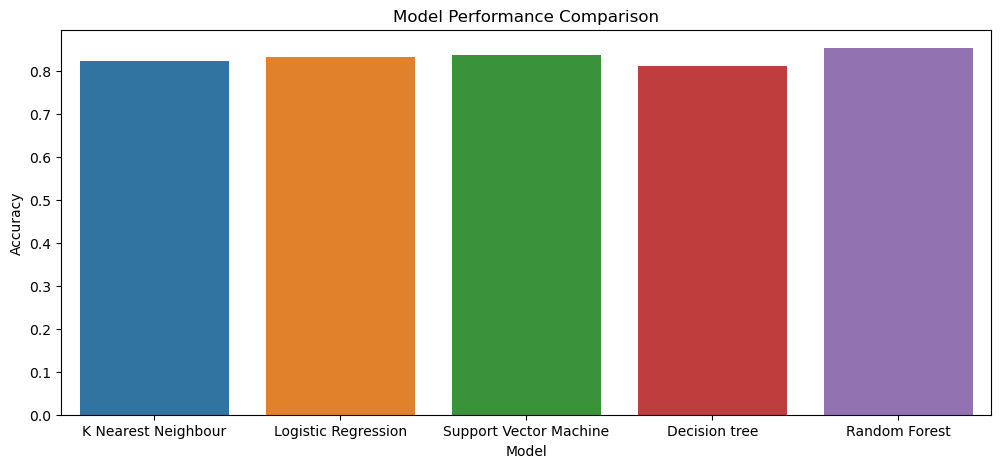

In [238]:
plt.figure(figsize=(12,5))

sns.barplot(x = accuracy.index , y = accuracy['Accuracy'])

plt.title('Model Performance Comparison')

plt.xlabel('Model')

#plt.xticks(rotation=90)

plt.show()

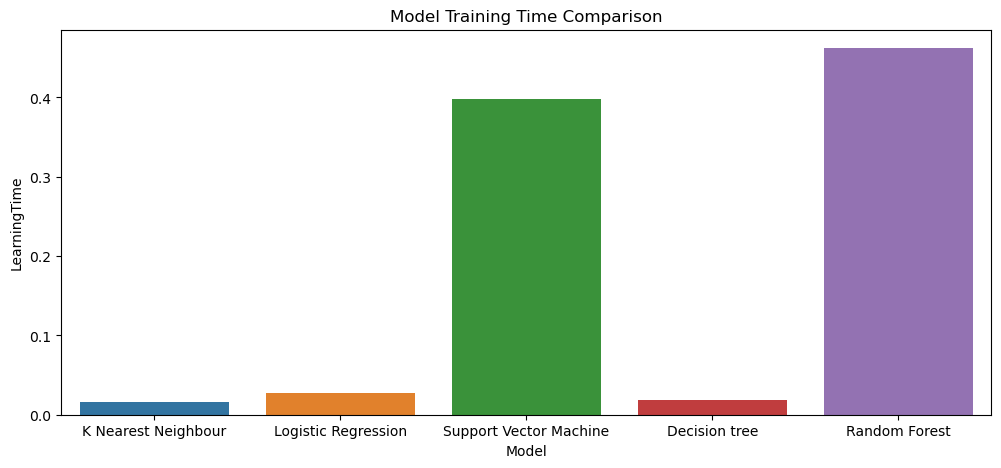

In [239]:
plt.figure(figsize=(12,5))

sns.barplot(x = accuracy['LearningTime'].index , y = accuracy['LearningTime'])

plt.title('Model Training Time Comparison')

plt.xlabel('Model')

#plt.xticks(rotation=90)

plt.show()

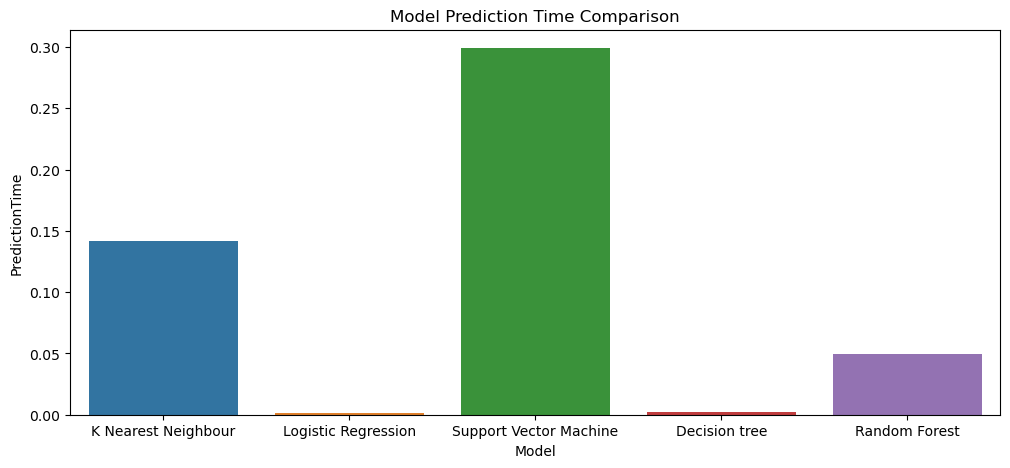

In [240]:
plt.figure(figsize=(12,5))

sns.barplot(x = accuracy['PredictionTime'].index , y = accuracy['PredictionTime'])

plt.title('Model Prediction Time Comparison')

plt.xlabel('Model')

#plt.xticks(rotation=90)

plt.show()